In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt
#create df for calendar.csv
df1 = pd.read_csv(r'C:\Users\dontknowVP\Desktop\Air BnB Project\calendar.csv')
df1.head(3)


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN


In [2]:
#create df for listings.csv
pd.set_option('display.max_columns', None)
df2 = pd.read_csv(r'C:\Users\dontknowVP\Desktop\Air BnB Project\listings.csv')
df2.head(3)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

Question 2: How well can we predict prices?

In [3]:
#create DF with explanatory variables
df=df2[['host_response_rate', 'host_response_time','host_is_superhost', 'host_listings_count', 'host_has_profile_pic','host_neighbourhood',
       'neighbourhood','zipcode','is_location_exact','property_type','room_type','accommodates',
       'bathrooms','bedrooms','beds','bed_type','price', 'number_of_reviews', 'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification', 'reviews_per_month', 'review_scores_rating']]



In [4]:
#clean data
#get column for price as float, drop old column

def float_price(row):
    '''
    INPUT:
    row - row of dataframe
    
    Output:
    float - float, denoting the price extracted from row
    '''
    str= row['price'][1:]
    str=str.replace(',', '')
    return float(str)
df['float_price']=df.apply(lambda row: float_price(row), axis=1)
df = df.drop(['price'],axis=1)



C:\Users\dontknowVP\anaconda3\envs\TensorFlow\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
#get column for host_response_rate as float, drop old column

def float_host_response_rate(row):
    '''
    INPUT:
    row - row of dataframe
    
    Output:
    float - float, denoting the host_response_rate extracted from row
    '''
    stri= str(row['host_response_rate'])
    stri=stri.replace('%', '')
    return float(stri)
df['float_host_response_rate']=df.apply(lambda row: float_host_response_rate(row), axis=1)
df = df.drop(['host_response_rate'],axis=1)


In [6]:
#check for missing data, impute with mode if more than 10% of rows missing
fill_mode = lambda col: col.fillna(col.mode()[0])

try:
    df.apply(fill_mode, axis=0)
except:
    print('That broke...')
    
#impute with mode if more than 10% of rows missing
missing_vals=[]
for i in df.columns:
    if df[i].isnull().mean()>0.1:
        print(i)
        df[i]=df[i].fillna(df[i].mode()[0])
    missing_vals.append(df[i].isnull().mean())
        
#print remaining columns with less than 10% missing values        
missing_vals.sort(reverse=True)
print(missing_vals)

#drop missing rows
shape_bef=df.shape[0]
print(df.shape[0])
df=df.dropna()
print(df.shape[0])
shape_aft=df.shape[0]
print('dropped ', shape_bef-shape_aft, ' rows')

host_response_time
neighbourhood
reviews_per_month
review_scores_rating
float_host_response_rate
[0.0785751702462022, 0.0041906757464641176, 0.0018334206390780514, 0.001571503404924044, 0.0005238344683080147, 0.0005238344683080147, 0.0005238344683080147, 0.00026191723415400735, 0.00026191723415400735, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
3818
3490
dropped  328  rows


In [7]:
#get dummy variables and drop non-numeric variables from df
dummy_vars = pd.get_dummies(df[df.select_dtypes(include=['object']).columns])
df=df.drop(df[df.select_dtypes(include=['object']).columns], axis=1)
df=pd.merge(df,dummy_vars, left_index=True, right_index=True)

In [8]:
#Split intro train and test data
X = df.drop(['float_price'],axis=1)
y = df['float_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state=7)

In [9]:
# fit OLS model
olsmod = sm.OLS(y_train,X_train)
olsres = olsmod.fit()
print(olsres.summary())



                            OLS Regression Results                            
Dep. Variable:            float_price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     18.66
Date:                Sun, 24 Jan 2021   Prob (F-statistic):               0.00
Time:                        12:52:13   Log-Likelihood:                -12489.
No. Observations:                2338   AIC:                         2.541e+04
Df Residuals:                    2123   BIC:                         2.665e+04
Df Model:                         214                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [33]:
# get test ME and R^2
ypred = olsres.predict(X_test) # out of sample prediction
ols = sqrt(mean_squared_error(y_test,ypred)) #Mean error
rsquared = y_test.corr(ypred)**2 #R^2

print('ME: ', ols, '\nR^2: ', rsquared)

ME:  69.10674329861479 
R^2:  0.5272282134865829


In [44]:
#sort ols parameters
list1 = sorted(olsres.params)
print(list1)

[-319.45867408290485, -142.9914985565129, -106.22152459457851, -100.48347246753471, -89.48266492997205, -81.99393023488703, -81.07852956459554, -72.3264204147373, -66.95552176203064, -65.914143442324, -63.45960142304688, -63.191073937626115, -61.907911826635484, -60.894289750503724, -58.838946545694874, -57.81539707514122, -56.46786378581052, -56.07325638065312, -54.96393348364633, -51.86695483446793, -51.33126065741913, -50.62974480444997, -48.19635286602403, -46.56183081599376, -46.303805419584556, -45.76422632756416, -40.05920340636899, -37.855474836885406, -36.467249916392575, -35.883233005954835, -32.94897900797618, -32.948979007976014, -32.653916478262765, -32.15094560018202, -32.15094560018195, -31.965636031112208, -31.957505924936658, -29.134177393404894, -28.15807502093245, -26.24774839723819, -26.207074983360727, -26.20707498336062, -25.76004989219285, -25.63164389862261, -25.044352274586295, -25.04435227458555, -24.350310791629873, -22.229038587100344, -22.229038587099158, -

In [52]:
#check OLS parameters with highest values
df2[df2['property_type']=='Dorm']

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1069,6119821,https://www.airbnb.com/rooms/6119821,20160104002432,2016-01-04,Green Tortoise Hostel,Our centrally located Seattle hostel is famous...,Conveniently located at First Avenue and Pike ...,Our centrally located Seattle hostel is famous...,none,The Green Tortoise is located right in the hea...,Towel rentals: $1 Lock rentals: $5 ($3 refunde...,We're located just a few blocks from the LINK ...,https://a1.muscache.com/ac/pictures/76269495/3...,https://a1.muscache.com/im/pictures/76269495/3...,https://a1.muscache.com/ac/pictures/76269495/3...,https://a1.muscache.com/ac/pictures/76269495/3...,31751507,https://www.airbnb.com/users/show/31751507,Rex,2015-04-22,"Seattle, Washington, United States",NaN,within an hour,100%,100%,f,https://a0.muscache.com/ac/users/31751507/prof...,https://a0.muscache.com/ac/users/31751507/prof...,Pike Place Market,2.0,2.0,"['email', 'phone', 'reviews', 'jumio']",t,t,"Pike Street, Seattle, WA 98101, United States",Pike Place Market,Pike-Market,Downtown,Seattle,WA,98101,Seattle,"Seattle, WA",US,United States,47.609080,-122.340106,t,Dorm,Shared room,8,0.0,1.0,8.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,Breakfas...",NaN,$38.00,NaN,NaN,NaN,$6.00,1,$44.00,1,1125,3 months ago,t,20,50,75,342,2016-01-04,19,2015-05-19,2016-01-01,93.0,9.0,9.0,9.0,9.0,10.0,9.0,f,NaN,WASHINGTON,f,moderate,f,f,2,2.47
1073,8212989,https://www.airbnb.com/rooms/8212989,20160104002432,2016-01-04,Green Tortoise,Our centrally located Seattle hostel is famous...,NaN,Our centrally located Seattle hostel is famous...,none,NaN,NaN,NaN,https://a0.muscache.com/ac/pictures/106990054/...,https://a0.muscache.com/im/pictures/106990054/...,https://a0.muscache.com/ac/pictures/106990054/...,https://a0.muscache.com/ac/pictures/106990054/...,31751507,https://www.airbnb.com/users/show/31751507,Rex,2015-04-22,"Seattle, Washington, United States",NaN,within an hour,100%,100%,f,https://a0.muscache.com/ac/users/31751507/prof...,https://a0.muscache.com/ac/users/31751507/prof...,Pike Place Market,2.0,2.0,"['email', 'phone', 'reviews', 'jumio']",t,t,"Pike Street, Seattle, WA 98101, United States",Pike Place Market,Pike-Market,Downtown,Seattle,WA,98101,Seattle,"Seattle, WA",US,United States,47.607724,-122.340476,t,Dorm,Shared room,8,8.0,1.0,8.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,Breakfas...",NaN,$41.00,NaN,NaN,NaN,NaN,1,$45.00,1,1125,2 months ago,t,0,0,0,84,2016-01-04,3,2015-12-01,2015-12-31,87.0,9.0,9.0,9.0,9.0,10.0,10.0,f,NaN,WASHINGTON,f,flexible,f,f,2,2.57


In [75]:

df2[df2['host_neighbourhood']=='Holly']

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
185,8097708,https://www.airbnb.com/rooms/8097708,20160104002432,2016-01-04,3BR Sunny Ballard House,Fall Special! Enjoy some great savings! Our su...,Fall Special! Enjoy some great savings from no...,Fall Special! Enjoy some great savings! Our su...,none,"Ballard is full of great restaurants, boutique...",NaN,NaN,NaN,NaN,https://a0.muscache.com/ac/pictures/103160711/...,NaN,31148752,https://www.airbnb.com/users/show/31148752,Bo,2015-04-13,US,NaN,within a few hours,99%,100%,f,https://a2.muscache.com/ac/users/31148752/prof...,https://a2.muscache.com/ac/users/31148752/prof...,Holly,354.0,354.0,"['email', 'phone', 'linkedin', 'reviews', 'jum...",t,t,"7th Avenue Northwest, Seattle, WA 98107, Unite...",Ballard,West Woodland,Ballard,Seattle,WA,98107,Seattle,"Seattle, WA",US,United States,47.670912,-122.365600,t,House,Entire home/apt,6,1.5,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN,$250.00,NaN,NaN,NaN,$185.00,1,$0.00,2,1125,today,t,30,60,90,365,2016-01-04,1,2015-09-09,2015-09-09,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,f,f,8,0.25
361,8207848,https://www.airbnb.com/rooms/8207848,20160104002432,2016-01-04,2BR/1BA Open-Concept Condo,No need for a car on your Seattle vacation! Ou...,"Our 2BR/1BA condo, with its fantastic hillside...",No need for a car on your Seattle vacation! Ou...,none,"We're right on the Metro Transit bus route, wi...",NaN,NaN,https://a0.muscache.com/ac/pictures/104463497/...,https://a0.muscache.com/im/pictures/104463497/...,https://a0.muscache.com/ac/pictures/104463497/...,https://a0.muscache.com/ac/pictures/104463497/...,31148752,https://www.airbnb.com/users/show/31148752,Bo,2015-04-13,US,NaN,within a few hours,99%,100%,f,https://a2.muscache.com/ac/users/31148752/prof...,https://a2.muscache.com/ac/users/31148752/prof...,Holly,354.0,354.0,"['email', 'phone', 'linkedin', 'reviews', 'jum...",t,t,"Stone Way North, Seattle, WA 98103, United States",Fremont,Wallingford,Other neighborhoods,Seattle,WA,98103,Seattle,"Seattle, WA",US,United States,47.657879,-122.341800,t,Apartment,Entire home/apt,4,1.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$259.00,NaN,NaN,NaN,$155.00,1,$0.00,3,1125,today,t,30,60,90,365,2016-01-04,1,2015-09-16,2015-09-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,WASHINGTON,f,strict,f,f,8,0.27
515,9921445,https://www.airbnb.com/rooms/9921445,20160104002432,2016-01-04,Two LakeView Balconies in GreenLake,Take a seat on one of two private balconies at...,Take a seat on one of two private balconies at...,Take a seat on one of two private balconies at...,none,"Downtown Se

In [73]:

df2[df2['host_neighbourhood']=='Kaanapali']

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
251,4250367,https://www.airbnb.com/rooms/4250367,20160104002432,2016-01-04,Luxury in Queen Anne very walkable!,"Amazing views, close to downtown yet tucked aw...","Stunning, elegant property with amazing views!...","Amazing views, close to downtown yet tucked aw...",none,A community within walking distance of Downtow...,Walking distance to: -Seattle Center -Space Ne...,NaN,NaN,NaN,https://a0.muscache.com/ac/pictures/69002253/4...,NaN,919364,https://www.airbnb.com/users/show/919364,Jeff,2011-08-04,"Berkeley, California, United States",I studied Neuroscience and Psychology at UC Be...,within a few hours,90%,100%,f,https://a1.muscache.com/ac/users/919364/profil...,https://a1.muscache.com/ac/users/919364/profil...,Kaanapali,9.0,9.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Nob Hill Avenue North, Seattle, WA 98109, Unit...",Queen Anne,East Queen Anne,Queen Anne,Seattle,WA,98109,Seattle,"Seattle, WA",US,United States,47.629051,-122.350989,t,House,Entire home/apt,7,4.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$600.00,"$3,150.00","$11,700.00","$1,500.00",$175.00,1,$0.00,3,1125,today,t,30,60,90,365,2016-01-04,8,2014-10-13,2015-11-29,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,flexible,f,f,1,0.53
402,5992645,https://www.airbnb.com/rooms/5992645,20160104002432,2016-01-04,Charming & Cozy Greenlake Bungalow,Charming 1908 Craftsman Bungalow close to Gree...,Charming 1908 Craftsman Bungalow close to Gree...,Charming 1908 Craftsman Bungalow close to Gree...,none,This location is in the GreenLake / Wallingfor...,NaN,Closest bus route to downtown Seattle just 1.5...,NaN,NaN,https://a2.muscache.com/ac/pictures/0c440a00-4...,NaN,24563934,https://www.airbnb.com/users/show/24563934,Brandon,2014-12-07,"Seattle, Washington, United States",NaN,within a few hours,100%,100%,f,https://a1.muscache.com/ac/users/24563934/prof...,https://a1.muscache.com/ac/users/24563934/prof...,Kaanapali,7.0,7.0,"['email', 'phone', 'facebook', 'google', 'link...",t,t,"North 57th Street, Seattle, WA 98103, United S...",Wallingford,Wallingford,Other neighborhoods,Seattle,WA,98103,Seattle,"Seattle, WA",US,United States,47.670964,-122.328863,t,House,Entire home/apt,4,1.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN,$155.00,"$1,096.00","$3,500.00",$500.00,$100.00,4,$25.00,3,1125,today,t,10,30,60,334,2016-01-04,1,2015-08-26,2015-08-26,80.0,10.0,8.0,10.0,10.0,10.0,8.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.23


Text(0.5, 1.0, 'price histogram')

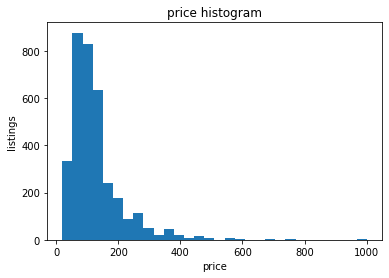

In [72]:
#plot price histogram
plt.hist(df['float_price'], bins=30)
plt.ylabel('listings')
plt.xlabel('price')
plt.title('price histogram')



Text(0.5, 1.0, 'price histogram')

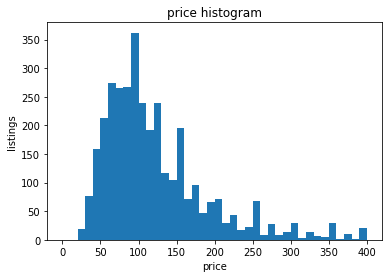

In [71]:
#plot price histogram with price < 400
plt.hist(df['float_price'], bins=40, range=(0,400))
plt.ylabel('listings')
plt.xlabel('price')
plt.title('price histogram')